In [2]:
# Install Colab
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:08
🔁 Restarting kernel...


In [3]:
# Install Stable Baselines, Gym, and Pytao
!apt-get install ffmpeg freeglut3-dev xvfb
!pip install "stable-baselines3[extra]>=2.0.0a4"
!pip install gymnasium

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  freeglut3 libegl-dev libfontenc1 libgl-dev libgl1-mesa-dev libgles-dev libgles1 libglu1-mesa
  libglu1-mesa-dev libglvnd-core-dev libglvnd-dev libglx-dev libice-dev libopengl-dev libsm-dev
  libxfont2 libxkbfile1 libxt-dev x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
Suggested packages:
  libice-doc libsm-doc libxt-doc
The following NEW packages will be installed:
  freeglut3 freeglut3-dev libegl-dev libfontenc1 libgl-dev libgl1-mesa-dev libgles-dev libgles1
  libglu1-mesa libglu1-mesa-dev libglvnd-core-dev libglvnd-dev libglx-dev libice-dev libopengl-dev
  libsm-dev libxfont2 libxkbfile1 libxt-dev x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 25 newly installed, 0 to remove and 0 not upgraded.
Need to

In [1]:
!conda install -c conda-forge pytao
!conda install -c conda-forge bmad

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pytao


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    cached-property-1.5.2      |       hd8ed1ab_1           4 KB  conda-forge
    cached_property-1.5.2      |     pyha770c72_1          11 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    h5py-3.11.0                |nompi_py310h65828d5_100         1.1 MB  conda-forge
    hdf5-1.14.3                |nompi_h4f84152_100         3.7 MB  conda-forge
    libaec-1

In [7]:
# Import libraries
import environ as en
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import SAC
from stable_baselines3.sac.policies import MlpPolicy
import pytao
from tqdm import tqdm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Num of updates = max_steps_per_episode / num_steps_in_model

# Hyperparameters
max_steps_per_episode = 128
steps_to_train = 512
num_steps_in_model = 64 # PPO
train_freq = 1 # SAC
gradient_steps = 1 # SAC
learning_rate = 0.001
gamma = 0.99
tau = 0.005
gae_lambda = 0.95
batch_size = 16
determ = False
convergence_val = 0.05
reward_alpha = 1e-1
reward_beta = 1e-2

In [9]:
# Create an enviroment for the model

env = en.LTBEnv("tao.init",
                {"orbit.x": "MW", "orbit.y": "MW"},
                ["correctors_x", "correctors_y"],
                -0.01,
                0.01,
                max_steps = max_steps_per_episode,
                convergence_val = convergence_val,
                reward_alpha = reward_alpha,
                reward_beta = reward_beta)

# Make the model

## PPO
# model = PPO(MlpPolicy, env, verbose=0, n_steps = num_steps_in_model, learning_rate = learning_rate, batch_size = batch_size, gamma = gamma, gae_lambda = gae_lambda, tau = tau)
# random_model = PPO(MlpPolicy, env, verbose=0, n_steps = num_steps_in_model, learning_rate = learning_rate, batch_size = batch_size, gamma = gamma, gae_lambda = gae_lambda)
model = SAC(MlpPolicy, env, verbose=0, train_freq = train_freq, gradient_steps = gradient_steps, learning_rate = learning_rate, batch_size = batch_size, gamma = gamma, tau = tau)
random_model = SAC(MlpPolicy, env, verbose=0, train_freq = train_freq, gradient_steps = gradient_steps, learning_rate = learning_rate, batch_size = batch_size, gamma = gamma, tau = tau)

# Train the model
num_episodes = 5
steps_per_episode = []
max_state_per_episode = []
final_action_list = []
for episode in tqdm(range(num_episodes)):
  # Train the model
  model.learn(total_timesteps = steps_to_train, progress_bar = True)

  vec_env = model.get_env()
#   print(state)
  state = vec_env.reset()
  step = 0

  # Replay Buffer
  states = [state]
  action_list = []
  rewards = []
  dones = []

  # Test the convergence of the model
  while True:
      action, _ = model.predict(state, deterministic=determ)
      new_state, reward, done, _ = vec_env.step(action)
      states.append(new_state), rewards.append(reward), dones.append(done), action_list.append(action)

      step += 1

      if done:
         break
      state = new_state

  print(step)
  steps_per_episode.append(step)
  max_state_per_episode.append(np.max(state))
  final_action_list.append(action)

  0%|          | 0/1 [00:00<?, ?it/s]

Output()

convergence achieved

convergence achieved

convergence achieved

convergence achieved

convergence achieved

convergence achieved

convergence achieved

convergence achieved

convergence achieved

convergence achieved

convergence achieved

convergence achieved

convergence achieved

convergence achieved

convergence achieved

100%|██████████| 1/1 [01:44<00:00, 104.08s/it]

convergence achieved
68


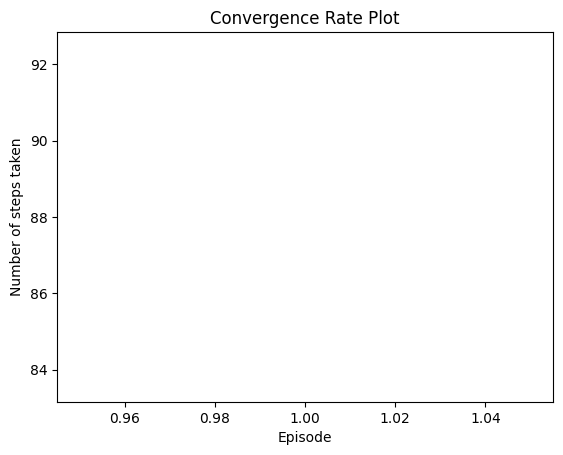

In [4]:
plt.plot(np.arange(start = 1, stop = num_episodes+1, step = 1), steps_per_episode)
plt.xlabel("Episode")
plt.ylabel("Number of steps taken")
plt.title("Convergence Rate Plot")
plt.show()

Final Corrector Values for Episode 1 are [[ 0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01  0.01  0.01  0.01  0.01  0.01
   0.01]]


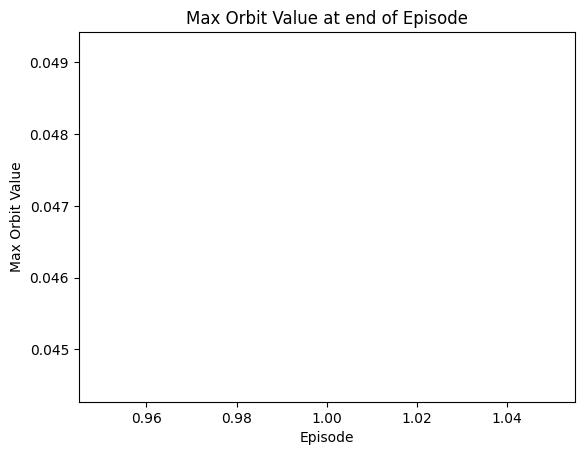

In [5]:
for i, final_action in enumerate(final_action_list):
  print(f"Final Corrector Values for Episode {i+1} are {final_action}")

plt.plot(np.arange(start = 1, stop = num_episodes+1, step = 1), max_state_per_episode)
plt.xlabel("Episode")
plt.ylabel("Max Orbit Value")
plt.title("Max Orbit Value at end of Episode")
plt.show()

In [10]:
## Real Time test
vec_env = model.get_env()

real_state = vec_env.reset()
real_step = 0

# Replay Buffer
real_states = [real_state]
print(real_state)
real_action_list = []
real_rewards = []
real_dones = []

# Test the convergence of the trained model
while True:
  real_action, _ = model.predict(real_state, deterministic=determ)
  new_real_state, real_reward, real_done, _ = vec_env.step(real_action)
  real_states.append(new_real_state), real_rewards.append(real_reward), real_dones.append(real_done), real_action_list.append(real_action)
  print(new_real_state)
  real_step += 1
  real_state = new_real_state
  if real_done:
      break

[[-0.00405892  0.01321052 -0.02137649 -0.01070236  0.03707803 -0.03562076]]
[[ 0.00943257 -0.04208566  0.20428004 -0.02098991  0.07441386 -0.12465457]]
[[-0.06912099 -0.10144532  0.00184132  0.02227937 -0.06062258  0.01951495]]
[[ 0.02344497  0.12422728 -0.24674581 -0.02221936  0.07391345 -0.06631288]]
[[ 0.03266601  0.07259219 -0.01918999 -0.02988049  0.0934776  -0.0542664 ]]
[[-0.03607033 -0.0338444  -0.07331339  0.00126052  0.06232187 -0.14240152]]
[[-0.0394744  -0.08708888  0.20370893  0.0026085   0.07121608 -0.08956966]]
[[-0.04079276 -0.06602513  0.12768512  0.01037413 -0.04825392  0.12142598]]
[[ 0.06324139  0.05964846  0.16880379 -0.04488296  0.10263327 -0.07385904]]
[[-0.05294794 -0.04827778 -0.00937949  0.01131557  0.0605432  -0.10738105]]
[[-0.06859677 -0.15304996  0.25212772  0.01923859 -0.03667244  0.16287894]]
[[-0.03323316  0.01420203 -0.07363229  0.00470544  0.04886531 -0.02532781]]
[[ 0.02377023  0.07002669 -0.11605271 -0.02105845  0.01646507 -0.03369311]]
[[ 0.0169958

In [5]:
real_step, real_state, real_action, real_reward, real_done

(1,
 array([[-0.00405892,  0.01321052, -0.02137649, -0.01070236,  0.03707803,
         -0.03562076]]),
 array([[ 0.01, -0.01, -0.01, -0.01, -0.01,  0.01, -0.01, -0.01,  0.01,
         -0.01, -0.01, -0.01, -0.01]]),
 array([10.], dtype=float32),
 array([ True]))

In [6]:
np.max(np.abs(real_state))

0.037078032

In [12]:
real_rewards, real_states, real_action_list

([array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([10.], dtype=float32)],
 [array([[-0.00405892,  0.01321052, -0.02137649, -0.01070236,  0.03707803,
          -0.03562076]]),
  array([[ 0.00943257, -0.04208566,  0.20428004, -0.02098991,  0.07441386,
          -0.12465457]]),
  array([[-0.06912099, -0.10144532,  0.00184132,  0.02227937, -0.06062258,
           0.01951495]]),
  array([[ 0.02344497,  0.12422728, -0.24674581, -0.02221936,  0.07391345,
          -0.0663128

In [11]:
vec_env = random_model.get_env()

random_real_state = vec_env.reset()
random_real_step = 0

# Replay Buffer
random_real_states = [random_real_state]
print(random_real_state)
random_real_action_list = []
random_real_rewards = []
random_real_dones = []

# Test the convergence of the trained model
while True:
  random_real_action, _ = random_model.predict(random_real_state, deterministic=determ)
  new_random_real_state, random_real_reward, random_real_done, _ = vec_env.step(random_real_action)
  random_real_states.append(new_random_real_state), random_real_rewards.append(random_real_reward), random_real_dones.append(random_real_done), random_real_action_list.append(random_real_action)
  print(new_random_real_state)
  random_real_step += 1
  random_real_state = new_random_real_state
  if random_real_done:
      break

[[-0.00405892  0.01321052 -0.02137649 -0.01070236  0.03707803 -0.03562076]]
[[-0.05251984 -0.10735304  0.20202829  0.01391807 -0.03286314  0.07796821]]
[[-0.06324844 -0.07264824 -0.02255802  0.01799776 -0.03047607  0.09273744]]
[[ 0.08737106  0.20203168 -0.23111664 -0.05887313  0.19885261 -0.15108008]]
[[-0.01189587  0.03584286 -0.24703599 -0.01113007  0.09132139 -0.15683111]]
[[ 0.00576074  0.07582214 -0.27257784 -0.01555578  0.04847294 -0.12924272]]
[[-0.02920638 -0.08724469  0.20809758 -0.00027795  0.03253712 -0.1333257 ]]
[[-0.00331791  0.01238432 -0.02627105 -0.01023709  0.00287985  0.08424803]]
[[-0.03444638 -0.07868223  0.15758277  0.00232663  0.02968286 -0.07865995]]
[[-0.02484885 -0.07806933  0.12239525 -0.00447422  0.03803235 -0.07640324]]
[[-0.04286055  0.02144854 -0.10474889  0.00946849  0.05547168 -0.01454259]]
[[-0.02816754 -0.04169503  0.00848802 -0.00339129  0.06386951 -0.0770534 ]]
[[ 0.07344752  0.12109632 -0.06098258 -0.04914314  0.09739384 -0.06449266]]
[[ 0.0342899

In [17]:
random_real_step, random_real_state, random_real_action, random_real_reward, random_real_done

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5,
 array([[-0.11640354, -0.08149615, -0.26494014,  0.04684639, -0.09222968,
         -0.00633795]]),
 array([[ 0.01, -0.01,  0.01,  0.01,  0.01,  0.01, -0.01, -0.01,  0.01,
          0.01,  0.01,  0.01,  0.01]]),
 array([-10.], dtype=float32),
 array([ True]))

In [18]:
np.max(np.abs(random_real_state))

0.26494014

In [19]:
random_real_rewards, random_real_states,

([array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([-10.], dtype=float32)],
 [array([[-0.00405892,  0.01321052, -0.02137649, -0.01070236,  0.03707803,
          -0.03562076]]),
  array([[ 0.10778078,  0.2437249 , -0.17240754, -0.06866749,  0.2417644 ,
          -0.12128456]]),
  array([[-0.03849261,  0.01062177, -0.04898406,  0.0015078 ,  0.14130511,
          -0.14159082]]),
  array([[-0.03849261,  0.01060603, -0.27860252,  0.0015078 ,  0.08362238,
          -0.191594  ]]),
  array([[-0.11640354, -0.08149615, -0.26494014,  0.04684639, -0.09222968,
          -0.00633795]]),
  array([[-0.00405892,  0.01321052, -0.02137649, -0.01070236,  0.03707803,
          -0.03562076]])])